In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive/MyDrive/Dataset/MRNet-v1.0  # Replace with your actual directory path

train		    train-acl.csv	valid		    valid-acl.csv
train-abnormal.csv  train-meniscus.csv	valid-abnormal.csv  valid-meniscus.csv


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:

# Define the function to load data
def load_data(folder_path):
 data = []
 for filename in os.listdir(folder_path):
  if filename.endswith(".npy"):
    file_path = os.path.join(folder_path, filename)
    loaded_data = np.load(file_path, allow_pickle=True)
    data.append(loaded_data[0])
 data = np.array(data)
 return data

In [ ]:
axial_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial")
coronal_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal")
sagittal_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal")
print(axial_data.shape)


(1130, 256, 256)


In [ ]:
# Flatten the data
axial_flat = axial_data.reshape(axial_data.shape[0], axial_data.shape[1], axial_data.shape[2], 1)
coronal_flat = coronal_data.reshape(coronal_data.shape[0], coronal_data.shape[1], coronal_data.shape[2], 1)
sagittal_flat = sagittal_data.reshape(sagittal_data.shape[0], sagittal_data.shape[1], sagittal_data.shape[2], 1)

In [ ]:
# Load labels
acl_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_label = acl_annotation.iloc[:, 1].values
print(acl_label.shape)
abnormal_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_label = abnormal_annotation.iloc[:, 1].values
meniscus_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_label = meniscus_annotation.iloc[:, 1].values

(1130,)


In [ ]:
axial_test_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial")
coronal_test_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal")
sagittal_test_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal")


In [ ]:
#Flatten the test data
axial_test_flat = axial_test_data.reshape(axial_test_data.shape[0], axial_test_data.shape[1], axial_test_data.shape[2], -1)
coronal_test_flat = coronal_test_data.reshape(coronal_test_data.shape[0], coronal_test_data.shape[1], coronal_test_data.shape[2], -1)
sagittal_test_flat = sagittal_test_data.reshape(sagittal_test_data.shape[0], sagittal_test_data.shape[1], sagittal_test_data.shape[2], -1)

In [ ]:
# Load test labels
acl_test_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv",header=None)
acl_test_label = acl_test_annotation.iloc[:, 1].values
abnormal_test_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv",header=None)
abnormal_test_label = abnormal_test_annotation.iloc[:, 1].values
meniscus_test_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv",header=None)
meniscus_test_label = meniscus_test_annotation.iloc[:, 1].values

In [ ]:
# Combine ABNORMAL data from different planes
X_train_ABNORMAL = np.concatenate((axial_flat, coronal_flat, sagittal_flat))
print(X_train_ABNORMAL.shape)
print(abnormal_label.shape)
X_test_ABNORMAL = np.concatenate((axial_test_flat, coronal_test_flat, sagittal_test_flat))


(3390, 256, 256, 1)
(1130,)


In [ ]:
print(axial_flat.shape)

(1130, 256, 256, 1)


In [ ]:
# Define the CNN model
model = tf.keras.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
print(X_train_ABNORMAL.shape)
print(abnormal_label.shape)


(1130, 768, 256, 1)
(1130,)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train_abnormal, abnormal_label, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "conv2d_12" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 256, 256, 3)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=uint8)
      • training=True
      • mask=None


In [ ]:
print(abnormal_test_annotation.shape)
print(X_test_ABNORMAL.shape)

(120, 2)
(360, 256, 256, 1)


In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_ABNORMAL, abnormal_test_label)
print("Test Accuracy:", accuracy)

ValueError: Data cardinality is ambiguous:
  x sizes: 3
  y sizes: 120
Make sure all arrays contain the same number of samples.

1/1 [==============================] - 0s 227ms/step


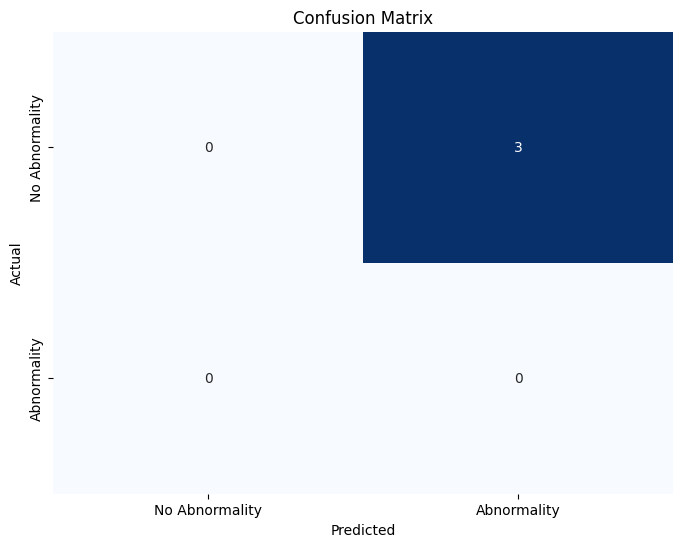

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict labels for test data
predictions = model.predict(X_test_ABNORMAL)
predicted_labels = (predictions > 0.5).astype(int)
# Generate confusion matrix
conf_matrix = confusion_matrix(abnormal_test_label, predicted_labels)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
 xticklabels=['No Abnormality', 'Abnormality'],
 yticklabels=['No Abnormality', 'Abnormality'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Combine ACL data from different planes
X_train_ACL = np.concatenate([axial_flat, coronal_flat, sagittal_flat])
X_test_ACL = np.concatenate([axial_test_flat, coronal_test_flat, sagittal_test_flat])


In [ ]:
# Define the CNN model
model = tf.keras.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train_ACL, acl_label, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 3.6027 - accuracy: 0.5000 - val_loss: 33.0997 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 552ms/step - loss: 32.0370 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 566ms/step - loss: 132.5245 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 550ms/step - loss: 6.0255 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 571ms/step - loss: 2.9545e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 562ms/step - loss: 7.5446 - accuracy: 0.5000 - val_loss: 7.1719e-17 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 540ms/step - loss: 2.0196e-28 - accuracy: 1.0000 - val_loss: 0.0367 - val_accu

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_ACL, acl_test_label)
print("Test Accuracy:", accuracy)

ValueError: Data cardinality is ambiguous:
  x sizes: 3
  y sizes: 120
Make sure all arrays contain the same number of samples.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict labels for test data
predictions = model.predict(X_test_ACL)
predicted_labels = (predictions > 0.5).astype(int)
# Generate confusion matrix
conf_matrix = confusion_matrix(acl_test_label, predicted_labels)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
 xticklabels=['No Abnormality', 'ACL'],
 yticklabels=['No Abnormality', 'ACL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1/1 [==============================] - 0s 291ms/step


ValueError: Found input variables with inconsistent numbers of samples: [120, 3]

In [ ]:
#combine MENISCUS data from different planes
X_train_MENISCUS = [axial_flat, coronal_flat, sagittal_flat]
X_test_MENISCUS = [axial_test_flat, coronal_test_flat, sagittal_test_flat]


In [ ]:
# Define the CNN model
model = tf.keras.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train_MENISCUS, meniscus_label, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_MENISCUS, meniscus_test_label)
print("Test Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict labels for test data
predictions = model.predict(X_test_MENISCUS)
predicted_labels = (predictions > 0.5).astype(int)
# Generate confusion matrix
conf_matrix = confusion_matrix(meniscus_test_label, predicted_labels)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
 xticklabels=['No Abnormality', 'Abnormality'],
 yticklabels=['No Abnormality', 'Abnormality'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel(